## Read the test data and normalize it, same as train data

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


plt.rcParams['font.size'] = 18

In [3]:
df = pd.read_csv('test.csv')

In [4]:
df.head(3)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1


In [5]:
df.shape

(9914, 7)

In [6]:
df.drop(['key'], axis=1, inplace=True)

In [7]:
## Create fare_bin column, which is not here

## Create other columns like abs_lat_diff and abs_lon_diff, we need date time to be in datetime format



In [8]:
## Abs_diff

fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'fare_bin',
       'abs_lat_diff', 'abs_lon_diff', 'Manhattan', 'euclidean


SyntaxError: invalid syntax (<ipython-input-8-82883382421c>, line 3)

In [9]:
df['abs_lat_diff'] = (df['pickup_latitude']-df['dropoff_latitude']).abs()
df['abs_lon_diff'] = (df['pickup_longitude']-df['dropoff_longitude']).abs()

In [10]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lat_diff,abs_lon_diff
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,0.019970,0.008110
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,0.019817,0.012024
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.005121,0.002870
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,0.016172,0.009288
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,0.045348,0.022519


In [11]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lat_diff,abs_lon_diff
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,0.022133,0.023348
std,0.042774,0.033541,0.039072,0.035435,1.278747,0.025589,0.036719
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,0.007279,0.006354
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,0.014715,0.013123
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,0.028261,0.024557
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,0.633213,0.849168


In [12]:
## Calculate the distance between the lat lon, using Eculidean and manhatten distance
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2-x1)**p) + (abs(y2-y1))**p)**(1/p)


In [13]:
df['Manhattan'] = minkowski_distance(df['pickup_longitude'], df['dropoff_longitude'], 
                                     df['pickup_latitude'], df['dropoff_latitude'], 1)

In [14]:
df['euclidean']= minkowski_distance(df['pickup_longitude'], df['dropoff_longitude'], 
                                     df['pickup_latitude'], df['dropoff_latitude'], 1)

In [15]:
train = pd.read_pickle('train_taxi.pickle')

In [16]:
train.head(3)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_bin,abs_lat_diff,abs_lon_diff,Manhattan,euclidean
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,"(0, 5]",0.009041,-0.002701,0.011742,0.009436
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,"(15, 20]",-0.070701,-0.036780,0.107481,0.079696
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,"(05, 10]",0.010708,0.008504,0.019212,0.013674


In [17]:
df.head(3)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lat_diff,abs_lon_diff,Manhattan,euclidean
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,0.019970,0.008110,0.028080,0.028080
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,0.019817,0.012024,0.031841,0.031841
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.005121,0.002870,0.007991,0.007991


In [18]:
## Check the correlation
corrs = train.corr()

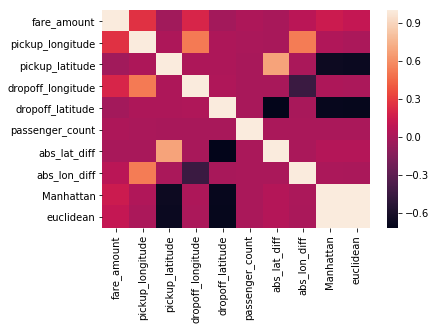

In [19]:
sns.heatmap(corrs)

Text(0.5, 1.0, 'Correlation of variables with fare amount')

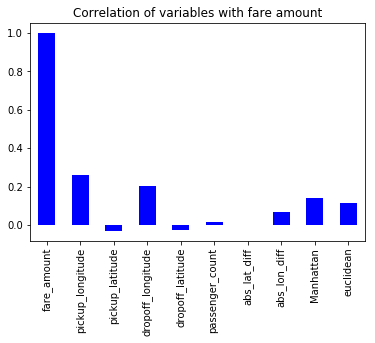

In [20]:
corrs['fare_amount'].plot(kind='bar', color='b')
plt.title('Correlation of variables with fare amount')

In [21]:
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 8

Text(0.5, 1.0, 'Correlation of variables with fare amount')

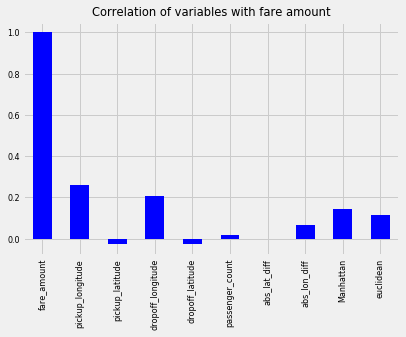

In [22]:
corrs['fare_amount'].plot(kind='bar', color='b')
plt.title('Correlation of variables with fare amount')

Almost all the variables is positively correlated with the fare amount, indicating it the variables increase, fare will increase as well

# Machine Learning model

There is strong linear correlation, hence we can proceed with linear regression,
we will be using the simplest model, so that it would be easy to interpret the model.
If the model performs above a threshold accuracy, we will proceed with complex models 

### Linear Regression

We will make our first model with 3 features abs_lat_diff, abs_lon_diff and passenger count, this will serve as a baseline to us for making other complex model.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()

### Creating Training and validation set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train, np.array(train['fare_amount']), stratify = train['fare_bin'], test_size=0.3)

In [25]:
X_train.head(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_bin,abs_lat_diff,abs_lon_diff,Manhattan,euclidean
499055,22.5,2014-04-08 19:28:27 UTC,-73.950182,40.772083,-74.006070,40.723897,1,"(20, 25]",0.048186,0.055888,0.104074,0.073793
11036,4.5,2012-05-22 20:52:22 UTC,-73.978752,40.736725,-73.988736,40.729830,1,"(0, 5]",0.006895,0.009984,0.016879,0.012133


In [26]:
y_train

array([22.5,  4.5,  8.5, ...,  6.5, 13.3,  8.5])

In [27]:
X_train['fare_bin'].value_counts()

(05, 10]    321948
(10, 15]    136655
(0, 5]      106353
(15, 20]     50387
(20, 25]     21836
[45+]        13795
(25, 30]     13723
(30, 35]     10090
(35, 40]      5876
(40, 45]      4746
Name: fare_bin, dtype: int64

In [28]:
train['fare_bin'].value_counts()

(05, 10]    459926
(10, 15]    195222
(0, 5]      151933
(15, 20]     71981
(20, 25]     31194
[45+]        19707
(25, 30]     19605
(30, 35]     14414
(35, 40]      8395
(40, 45]      6780
Name: fare_bin, dtype: int64

In [29]:
## Train with sample features
lr.fit(X_train[['abs_lat_diff', 'abs_lon_diff', 'passenger_count']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
lr.intercept_

11.119206343006438

In [31]:
lr.coef_[0], lr.coef_[1], lr.coef_[2]

(-0.06741448006598467, 15.335687478552783, 0.10610964755131146)

### Score model

We will use, for evaluation of model

**RMSE**

**R Squared**
    
We will use stats model for simplicity

In [32]:
import statsmodels.api as sm
mod = sm.OLS( y_train , X_train[['abs_lat_diff', 'abs_lon_diff', 'passenger_count']])

In [33]:
rinear_reg = mod.fit()

In [34]:
X_train.shape, y_train.shape

((685409, 12), (685409,))

In [35]:
rinear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                 1.395e+05
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        13:36:37   Log-Likelihood:            -2.6493e+06
No. Observations:              685409   AIC:                         5.299e+06
Df Residuals:                  685406   BIC:                         5.299e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
abs_lat_diff       -0.0761      0.047     -1.634      0.102      -0.167       0.015
abs_lon_diff       13.4431      0.298     45.073      0.000      12.859      14.028
passenger_count     4.2208      0.007    645.823      0.000       4.208       4.234
==============================================================================
Omnibus:                   246941.195   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1449682.544
Skew:                           1.624   Prob(JB):                         0.00
Kurtosis:                       9.341   Cond. No.                         45.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All the coeffiecients are possitive, except abs_lat_diff, i.e abs_lat_dis is inversely proportional to change in fare

In [36]:
test_mod = sm.OLS( y_test , X_test[['abs_lat_diff', 'abs_lon_diff', 'passenger_count']])

In [37]:
test_linear_reg = test_mod.fit()

In [38]:
test_linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                 5.975e+04
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        13:36:37   Log-Likelihood:            -1.1360e+06
No. Observations:              293748   AIC:                         2.272e+06
Df Residuals:                  293745   BIC:                         2.272e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
abs_lat_diff        0.0039      0.078      0.050      0.960      -0.149       0.157
abs_lon_diff        7.1302      0.320     22.264      0.000       6.502       7.758
passenger_count     4.2383      0.010    423.013      0.000       4.219       4.258
==============================================================================
Omnibus:                   109101.251   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           678233.637
Skew:                           1.662   Prob(JB):                         0.00
Kurtosis:                       9.661   Cond. No.                         32.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we see training R sq. is better than test R suuared

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [40]:
def metrics(train_pred, valid_pred, y_train, y_valid):
    """
    Calculate :
    Root mean square Error
    Mean abs per error - The avg. % error of predictor
    """
    # Root mean square error
    train_rmse= np.sqrt(mean_squared_error(y_train, train_pred))
    valid_rmse= np.sqrt(mean_squared_error(y_valid, valid_pred))
    
    # Mean absolute percentage Error
    train_ape = abs((y_train - train_pred)/y_train)
    valid_ape = abs((y_valid - valid_pred)/y_valid)
        
    ## Account for y values of 0
    
    train_ape[train_ape == np.inf] = 0
    train_ape[train_ape == -np.inf] = 0
    valid_ape[valid_ape == np.inf] = 0
    valid_ape[valid_ape == -np.inf] = 0
    
    train_map = 100 * np.mean(train_ape)
    valid_map = 100 * np.mean(valid_ape)
    
    return train_rmse, valid_rmse, train_map, valid_map
    
    

In [41]:
## Evaluation function

def evaluate(model, feature, X_train, X_valid, y_train, y_valid):
    
    '''Mean absolute percentsge error'''
    
    ##Predictione
    train_pred = model.predict(X_train[feature])
    valid_pred = model.predict(X_valid[feature])
    
    ## Get metrics
    train_rmse, valid_rmse, train_mape, valid_mape = metrics(train_pred, valid_pred, 
                                                            y_train, y_valid)
    
    print(f'Training : rmse = {round(train_rmse, 2)} \t mape = {round(train_mape,2)}')
    print(f'Valid : rmse = {round(valid_rmse,2)} \t\t mape = {round(valid_mape,2)}')

## RESULT : rmse and mape

In [42]:
evaluate(rinear_reg, ['abs_lat_diff', 'abs_lon_diff', 'passenger_count'], 
        X_train, X_test, y_train, y_test)

Training : rmse = 11.55 	 mape = 62.81
Valid : rmse = 11.58 		 mape = 62.69


#### We cant say these results are good or not without comparing it to some base line results

calculate the avg value of target value in training data

In [43]:
train_mean = y_train.mean()


# Creatre list of same predictions for every observations
train_preds = [train_mean for _ in range(len(y_train))]
valid_preds = [train_mean for _ in range(len(y_test))]

tr, vr, tm, vm = metrics(train_preds, valid_preds, y_train, y_test)

print(f'Baseline Training:   rmse = {round(tr, 2)} \t mape = {round(tm, 2)}')
print(f'Baseline Validation: rmse = {round(vr, 2)} \t mape = {round(vm, 2)}')

Baseline Training:   rmse = 9.35 	 mape = 64.9
Baseline Validation: rmse = 9.38 	 mape = 64.9


According to this result, we can sat our machine learning model is highly predictive, now we will make prediction on test data and save the model

In [44]:
test = pd.read_csv('test.csv')
test_id = list(test.pop('key'))

In [45]:
preds = lr.predict(df[['abs_lat_diff', 'abs_lon_diff', 'passenger_count']])

sub = pd.DataFrame({'key': test_id, 'fare_amount': preds})
sub.to_csv('sub_lr_simple.csv', index = False)

In [46]:
## As a sanaty check lets plot the prediction

C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


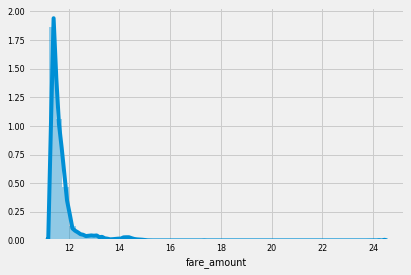

In [47]:
sns.distplot(sub['fare_amount'])